Project Topic:

This project aims to predict job titles in data oriented work based on three features: "Education Level", "Years of Experience", and "Salary". The aim of this project is to determine the best model to use for determining what a job is based on different variables. This could be useful in predicting the composition of job markets as well as discovering general trends in what salaries are for certain job titles and what demographics are most likely to hold these positions. The aim is to use categorization to determine what the job title is based on its attributes.

This project will be completed by creating a KNN model, SVM model, and random forest model which will be trained on a training data set (20% of the available data). These models will then be assessed using a test data set and compared to determine which model has the best predictive power.

The data used to train these models is the Salary_data data set from Kaggle and can be found on https://www.kaggle.com/datasets/mohithsairamreddy/salary-data.

Data:

As mentioned, the data used for this project was attained from the Salary_data data set from Kaggle and can be found on https://www.kaggle.com/datasets/mohithsairamreddy/salary-data.

The data consists of 6704 data points and was gathered from multiple sources according to the kaggle website.
The data consists of 6 variables: age of employee, experience of employee, job role (job title), and education level, gender of employee, and salary.



Data Preprocessing and cleaning:

In order to prepare the data to be used for analysis. The data set was first imported as a dataframe and the jobs were filtered to remove any rows in which the job title did not contain "data". This was done to streamline the data set as data jobs are the primary interest of this work and removing all other roles simplifies the analysis process and makes it more efficient and better modeled to data-oriented jobs specifically. 

Next any rows containing N/A, NAN or null values were removed. This was performed as the aim is to make the models work by predicting based on all of the available predictors. Next, indicator variables were created for education level. were standardized using StandardScaler to bring them to a common scale. After processing, the features and target variable were aligned, and the dataset was split into training and test sets.

Additionally there were redundant categories in the education level predictor, that were changed to no longer have two different values that meant the same thing. 

Exploratory Data Analysis:

Several visuals were created to investigate what interactions there are in the data and how it behaves. Specifically plots of Job title vs Salary, Job Title vs Years of Experience, and Years of Experience vs Salary were generated. A correlation matrix was also generated to see what variables were most strongly correlated and could possibly used as strong classification predictors. 

From the Job title vs salary graph, it can be seen that different job titles varied in there salaries. With the highest salaries being associated with Chief Data Officer Roles.

From the Job Title vs Years of Experience, it can also be seen that the different jobs disticntly vary in their average salaries. Similarly the Chief Data Officer role corresponds with the most years of experience.

In the Years of Experience vs Salary, it can be seen that the salary and years of experience are correlated. 

The correlation plot indicates that there may be correlation between the Salary and Years of Experience variables. However, the two variables are potentially strong predictors for job title so they will both be used in the model. 

KNN Model:

The K-Nearest Neighbors (KNN) algorithm was employed to classify job titles, with various values for the number of neighbors k tested to find the optimal model. The KNN model was initially trained using k=2, and its performance was evaluated through accuracy, classification report, and confusion matrix. To determine the best k, the model's performance was assessed across different k values (1, 2, 3, 4), and accuracy scores were plotted.

Results

The optimal value for k was found to be 3, which provided the highest classification accuracy. The evaluation metrics for KNN included accuracy, mean squared error (MSE), mean absolute error (MAE), and R² score. The performance for different k values showed that k=3 achieved the best results, indicating that this value of k balances model complexity and performance effectively.

SVM Model:

The Support Vector Machine (SVM) model was used with a linear kernel, and various regularization parameters C were tested to find the best configuration. An SVM model with C=0.01 was initially trained, and its performance was evaluated using accuracy, classification report, and confusion matrix. To determine the optimal C, the model's performance was compared across different C values (0.01, 1, 10, 100), and accuracy scores were plotted on a logarithmic scale.

Results
The best performance was achieved with a regularization parameter C of 10. This value of C provided the highest accuracy, suggesting that a higher regularization parameter helps in better generalization for this classification task. The evaluation metrics for SVM included accuracy, MSE, MAE, and R-sqaured score, confirming that C=10 was the most effective setting among those tested.

The Random Forest algorithm was used to classify job titles and identify feature importances. The model was trained and evaluated using accuracy, classification report, and confusion matrix. Additionally, the importance of each feature was analyzed to understand their contribution to the model's predictions.

Results
The Random Forest model identified "Salary" as the most important feature for predicting job titles. This finding highlights the significant role that salary plays in classification, compared to other features. The evaluation metrics for the Random Forest model included accuracy, MSE, MAE, and R² score. The feature importance analysis provided insights into which features most influence the model's predictions.

Conclusion:

The K-Nearest Neighbors (KNN) model performed optimally with k=3, achieving the highest accuracy. The Support Vector Machine (SVM) model performed best with a regularization parameter C=10, indicating improved generalization. The Random Forest model highlighted "Salary" as the most influential feature for predicting job titles.

The KNN and SVM models demonstrated effective classification performance with their respective optimal parameters. The Random Forest analysis identified "Salary" as a key feature in job title prediction. These results provide a solid foundation for further model refinement and application in job title classification tasks.

From the model comparison, it appears the random forest has the best accuracy and would be the best model to use to predict Job titles based on Salary, Years of Experience, and education level. 

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

C:\Users\12245\AppData\Local\Temp\ipykernel_22704\3309941536.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


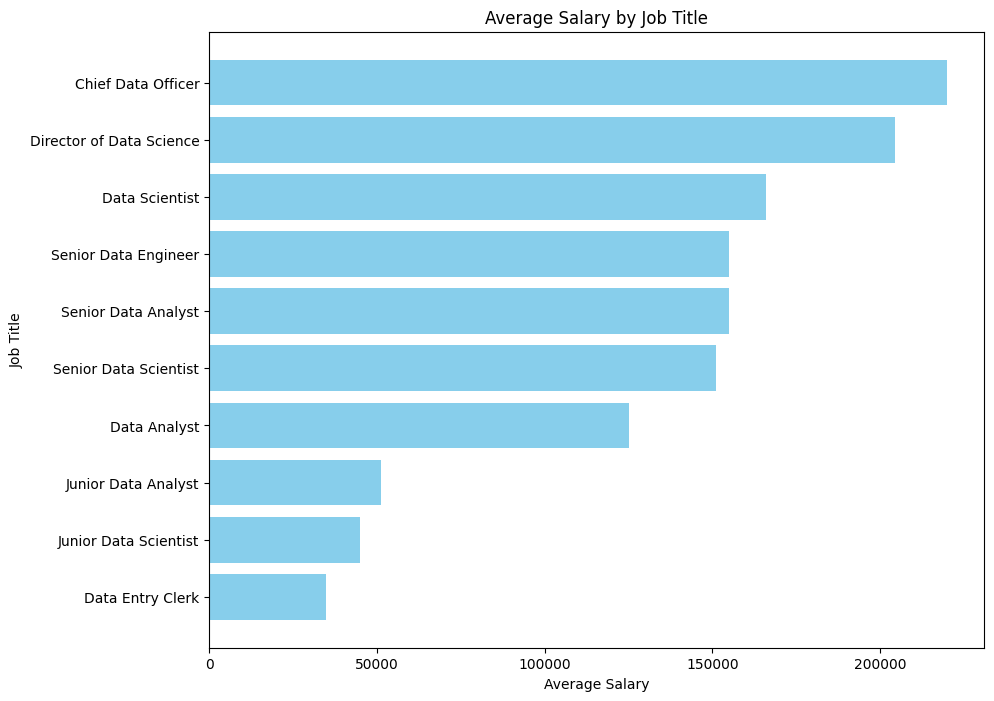

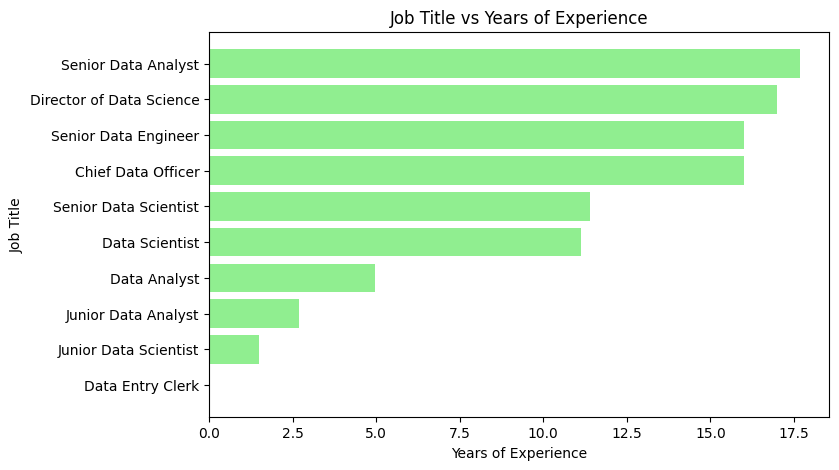

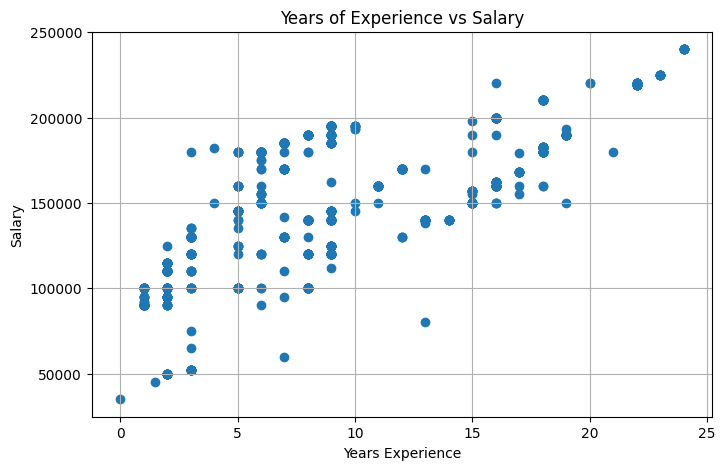

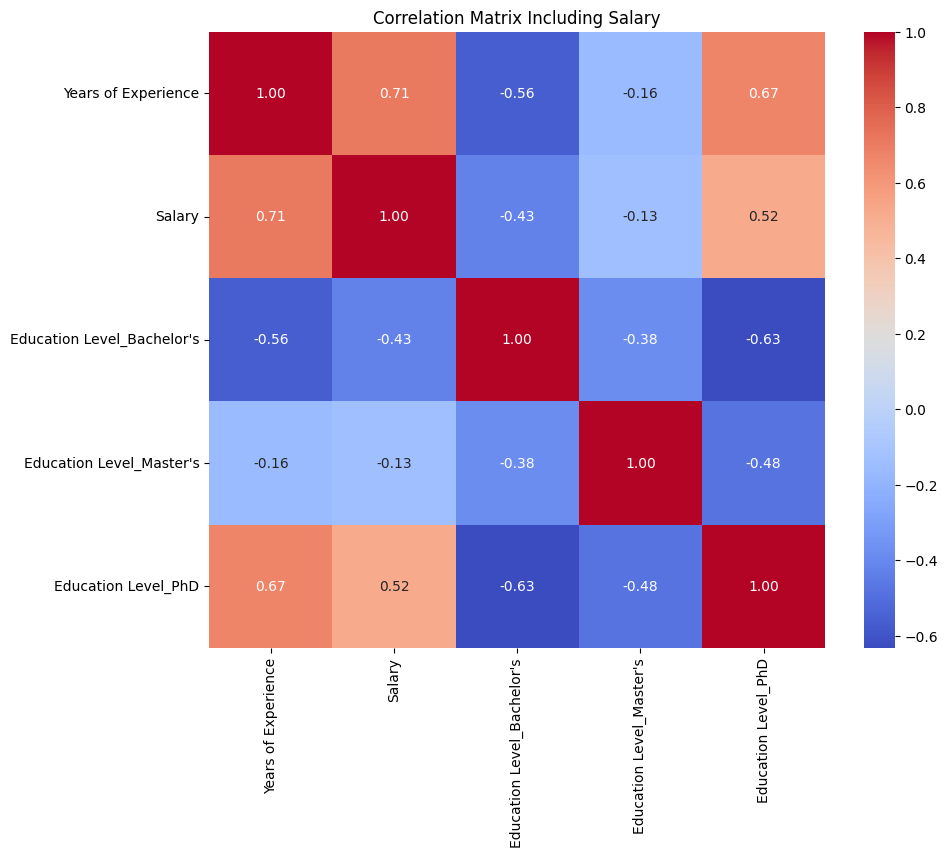

In [24]:
file_path = r"C:\Users\12245\Documents\Jupyter Projects\Salary_Data.csv"

salary_data = pd.read_csv(file_path)

salary_data = salary_data[salary_data["Job Title"].str.contains("data", case=False, na=False)]

salary_data["Education Level"] = salary_data["Education Level"].replace("Bachelor's Degree", "Bachelor's")
salary_data["Education Level"] = salary_data["Education Level"].replace("Master's Degree", "Master's")\

X = salary_data[["Education Level", "Years of Experience", "Salary"]]
y = salary_data["Job Title"]

X.dropna(inplace=True)
y.dropna(inplace=True)

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)



X_encoded = pd.get_dummies(X[["Education Level"]])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[["Years of Experience", "Salary"]])

X_processed = pd.concat([pd.DataFrame(X_scaled, columns=["Years of Experience", "Salary"]), X_encoded], axis=1)

X_processed = X_processed.reset_index(drop=True)
y = y.reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.8, random_state=2)

#Plot Job Title Vs Salary
average_salary_by_job = salary_data.groupby("Job Title")["Salary"].mean().sort_values()

plt.figure(figsize=(10, 8))
plt.barh(average_salary_by_job.index, average_salary_by_job.values, color='skyblue')
plt.xlabel("Average Salary")
plt.ylabel("Job Title")
plt.title("Average Salary by Job Title")
plt.show()

#Plot Job title vs Years Experience
avg_exp_by_job = salary_data.groupby("Job Title")["Years of Experience"].mean().sort_values()

plt.figure(figsize=(8,5))
plt.barh(avg_exp_by_job.index, avg_exp_by_job.values, color='lightgreen')
plt.xlabel("Years of Experience")
plt.ylabel("Job Title")
plt.title("Job Title vs Years of Experience")
plt.show()


#Plot Yrs Experience vs Salary
plt.figure(figsize=(8, 5))
plt.scatter(X["Years of Experience"], X["Salary"])
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.grid(True)
plt.show()

#Correlation PLot
correlation_matrix = X_processed.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix Including Salary")
plt.show()

KNN Accuracy: 0.94
                          precision    recall  f1-score   support

      Chief Data Officer       0.00      0.00      0.00         1
            Data Analyst       0.93      1.00      0.96       299
        Data Entry Clerk       0.00      0.00      0.00         1
          Data Scientist       0.96      0.93      0.94       355
Director of Data Science       0.91      0.95      0.93        42
     Junior Data Analyst       0.96      1.00      0.98        23
     Senior Data Analyst       0.00      0.00      0.00         3
    Senior Data Engineer       0.00      0.00      0.00         4
   Senior Data Scientist       0.89      0.81      0.85        48

                accuracy                           0.94       776
               macro avg       0.52      0.52      0.52       776
            weighted avg       0.93      0.94      0.93       776

[[  0   0   0   0   1   0   0   0   0]
 [  0 298   0   0   0   0   0   0   1]
 [  0   0   0   0   0   1   0   0   0]
 [ 

C:\Users\12245\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\12245\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\12245\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

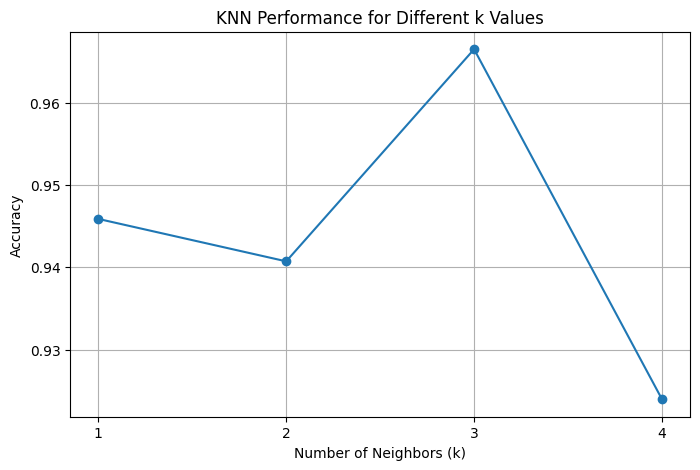

In [25]:
#KNN Model

k_range = [1, 2, 3, 4]
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Performance for Different k Values')
plt.xticks(k_range)
plt.grid(True)
plt.show()

SVM Accuracy: 0.84
                          precision    recall  f1-score   support

      Chief Data Officer       0.00      0.00      0.00         1
            Data Analyst       0.86      1.00      0.93       299
        Data Entry Clerk       0.00      0.00      0.00         1
          Data Scientist       0.82      0.99      0.89       355
Director of Data Science       0.00      0.00      0.00        42
     Junior Data Analyst       0.00      0.00      0.00        23
     Senior Data Analyst       0.00      0.00      0.00         3
    Senior Data Engineer       0.00      0.00      0.00         4
   Senior Data Scientist       0.00      0.00      0.00        48

                accuracy                           0.84       776
               macro avg       0.19      0.22      0.20       776
            weighted avg       0.71      0.84      0.77       776

[[  0   0   0   1   0   0   0   0   0]
 [  0 299   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0]
 [ 

C:\Users\12245\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\12245\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\12245\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

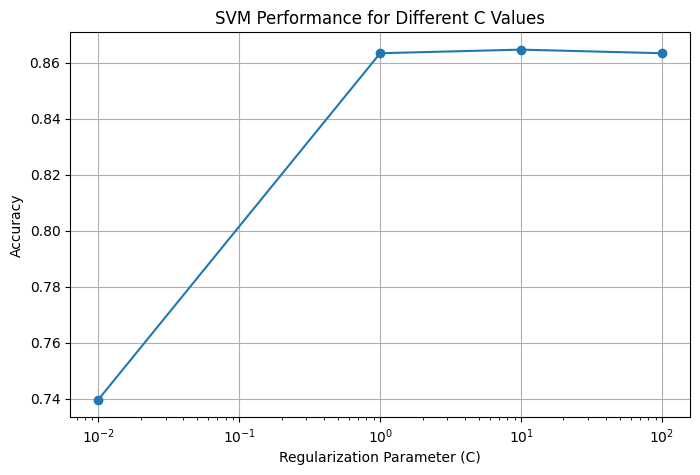

In [26]:
# SVM Model 

svm_model = SVC(C=0.10, kernel='linear')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

# SVM Performance for different C values
c_values = [0.01, 1, 10, 100]
svm_scores = []

for c in c_values:
    svm = SVC(C=c, kernel='linear')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    svm_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(c_values, svm_scores, marker='o')
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('SVM Performance for Different C Values')
plt.grid(True)
plt.show()

Random Forest Accuracy: 0.97
                          precision    recall  f1-score   support

      Chief Data Officer       0.00      0.00      0.00         1
            Data Analyst       0.99      1.00      0.99       299
        Data Entry Clerk       0.00      0.00      0.00         1
          Data Scientist       0.96      0.99      0.97       355
Director of Data Science       0.95      0.95      0.95        42
     Junior Data Analyst       0.96      1.00      0.98        23
     Senior Data Analyst       0.00      0.00      0.00         3
    Senior Data Engineer       0.00      0.00      0.00         4
   Senior Data Scientist       0.89      0.81      0.85        48

                accuracy                           0.97       776
               macro avg       0.53      0.53      0.53       776
            weighted avg       0.95      0.97      0.96       776

[[  0   0   0   0   1   0   0   0   0]
 [  0 298   0   0   0   0   0   0   1]
 [  0   0   0   0   0   1   0   

C:\Users\12245\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\12245\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\12245\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

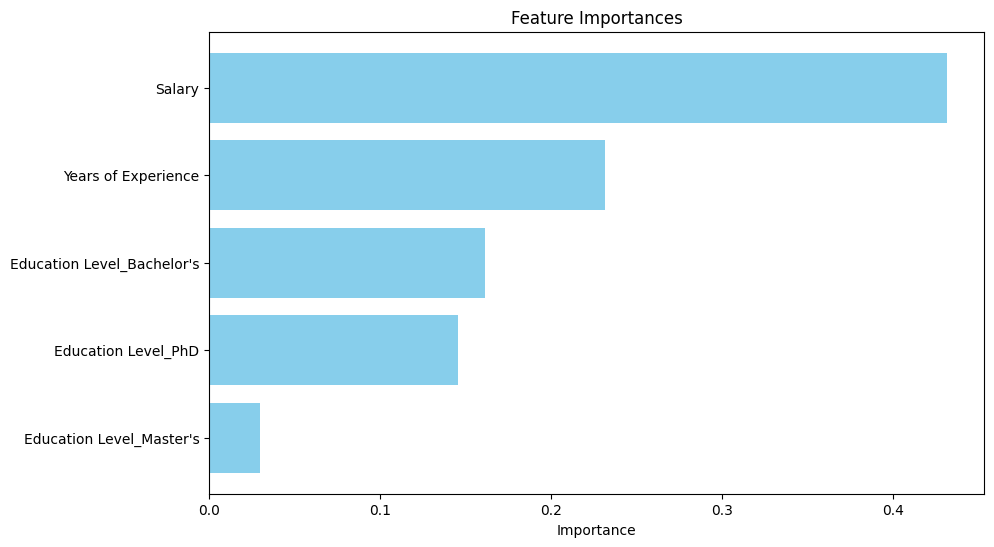

In [27]:
#Random forest 

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

importances = rf_model.feature_importances_
feature_names = X_processed.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


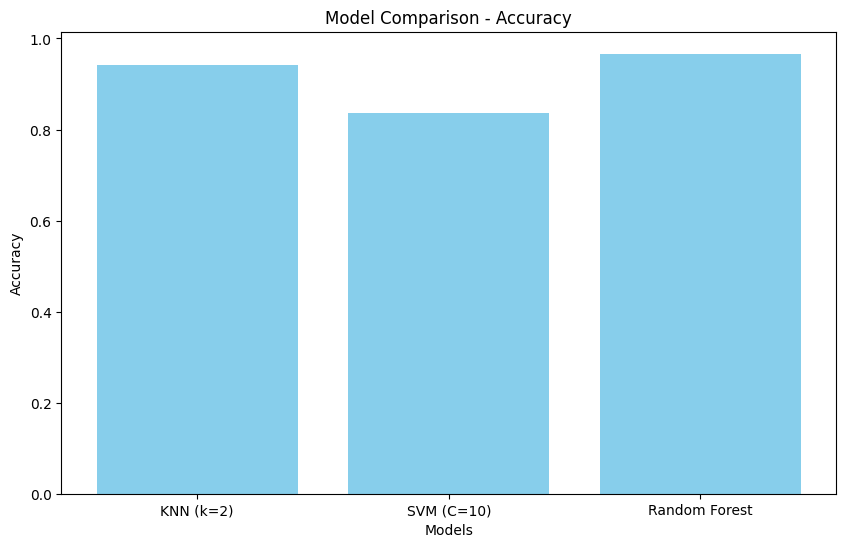

In [28]:
# Model Comparison 

models = ['KNN (k=2)', 'SVM (C=10)', 'Random Forest']
accuracy_scores = [accuracy_knn, accuracy_svm, accuracy_rf]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.show()